In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Ai course MEC\\Assignments\\data (1).csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.shape

(569, 33)

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop(['id','Unnamed: 32'],axis = 1, inplace=True)

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df.duplicated().sum()

0

In [13]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [14]:
df['diagnosis'].replace({'B':0, 'M':1}, inplace=True)

C:\Users\katie\AppData\Local\Temp\ipykernel_18920\3529161125.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].replace({'B':0, 'M':1}, inplace=True)


In [15]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [17]:
corr = df.corr()

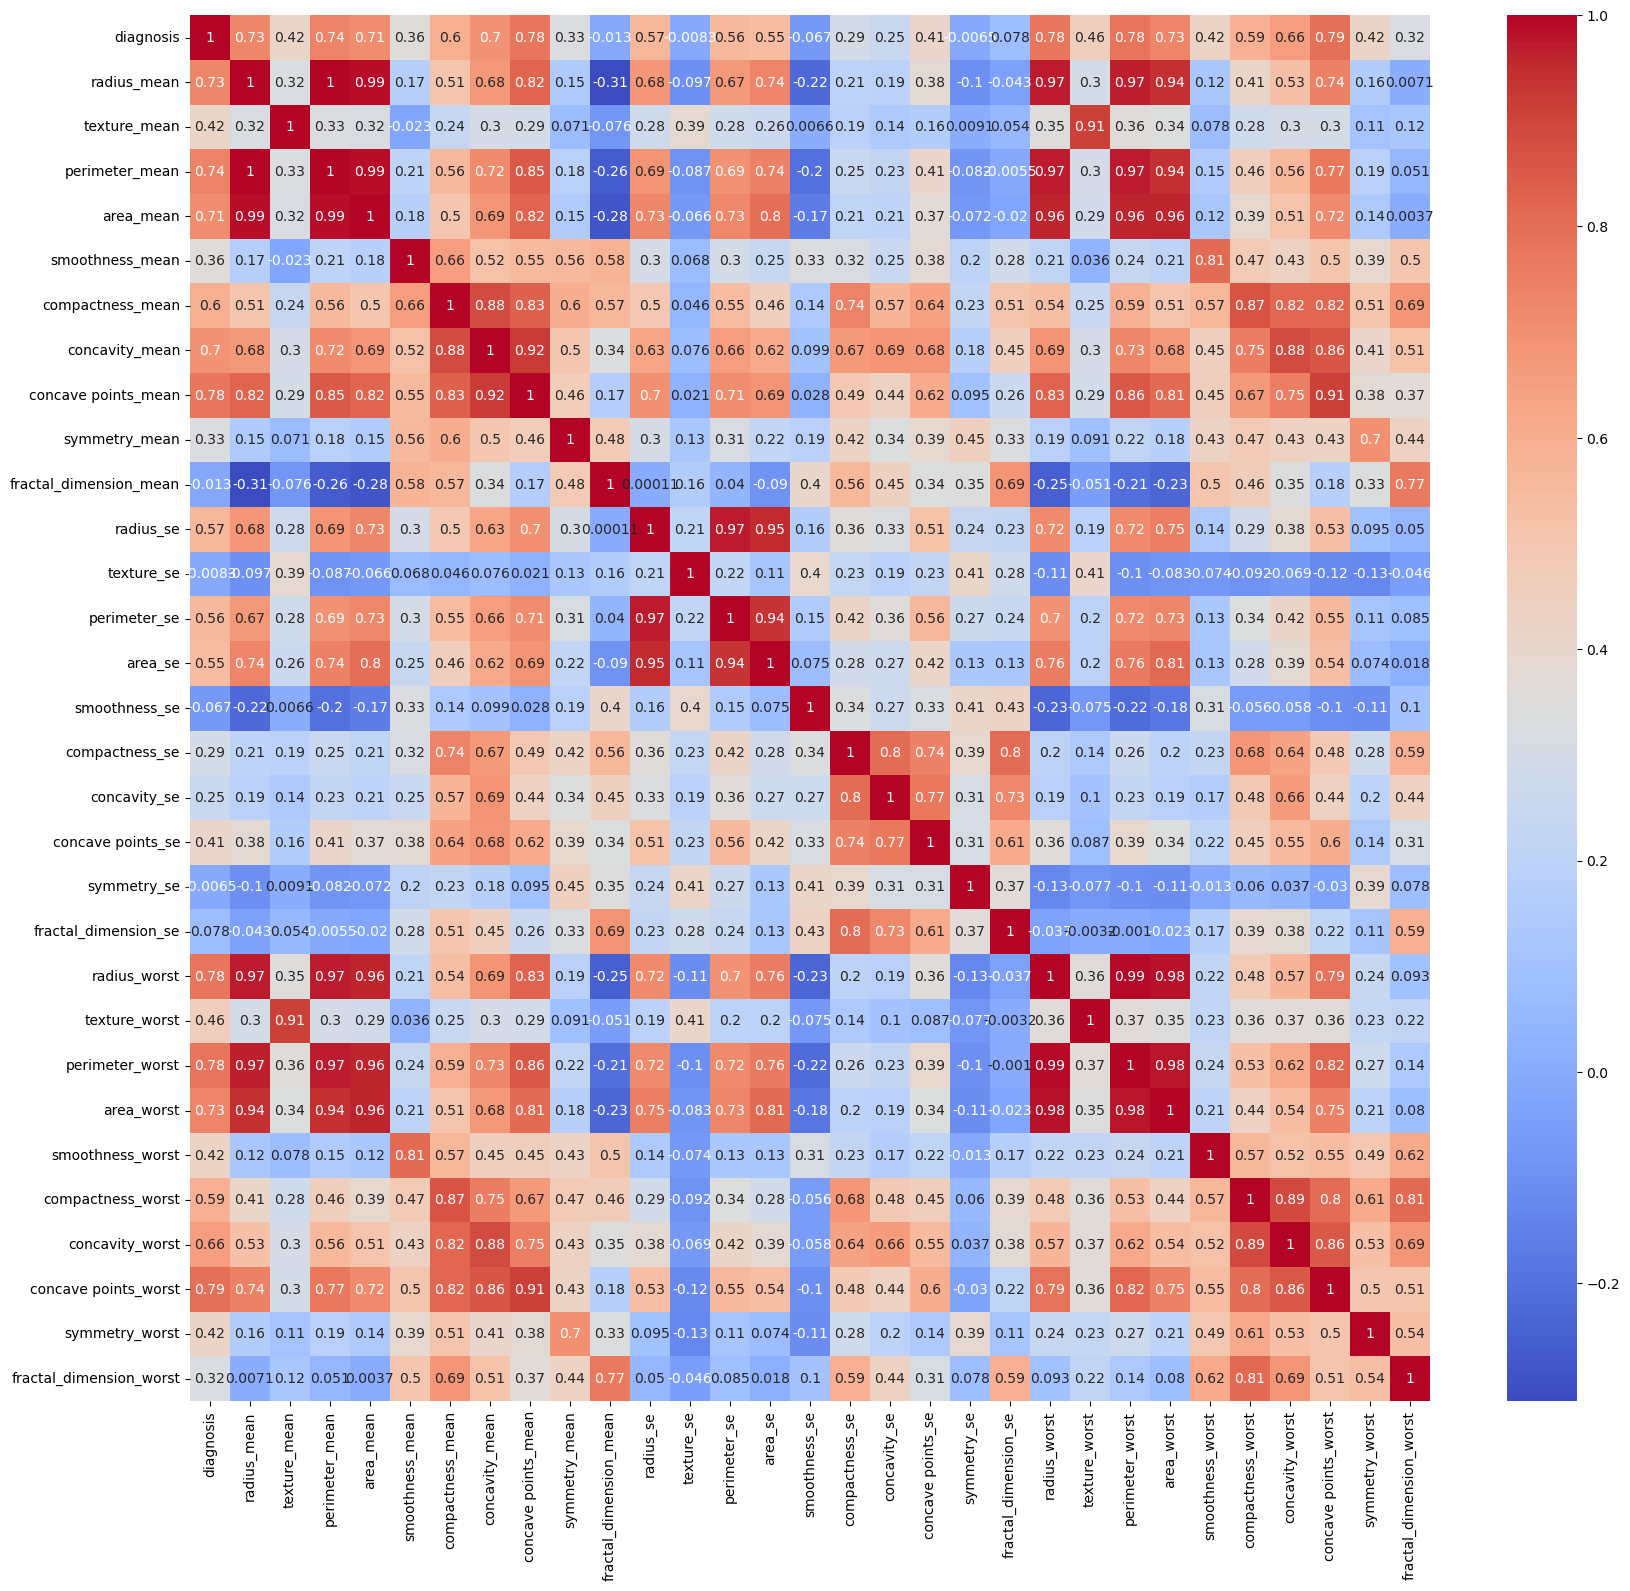

In [23]:
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot = True, cmap='coolwarm')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [26]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
feature_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean']

y = df['diagnosis']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df[feature_columns], y, test_size= 0.2 , random_state=42)

In [32]:
len(x_train)

455

In [33]:
len(y_train)

455

In [34]:
len(x_test)

114

In [35]:
len(y_test)

114

In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(x_train, y_train)

d:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = log_model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [40]:
print(f"accuracy :", accuracy)
print("---------------------")
print(f'confusion matrix :\n', conf_matrix)
print("------------------")
print(f'classification report:\n', class_report)

accuracy : 0.9385964912280702
---------------------
confusion matrix :
 [[68  3]
 [ 4 39]]
------------------
classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [41]:
svm_model = SVC()

In [42]:
svm_model.fit(x_train,y_train)

SVC()

In [43]:
svm_y_pred = svm_model.predict(x_test)

In [44]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

In [45]:
print(f"accuracy :", svm_accuracy)
print("---------------------")
print(f'confusion matrix :\n', svm_conf_matrix)
print("------------------")
print(f'classification report:\n', svm_class_report)

accuracy : 0.9210526315789473
---------------------
confusion matrix :
 [[71  0]
 [ 9 34]]
------------------
classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       1.00      0.79      0.88        43

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [47]:
scaler = MinMaxScaler()

In [48]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
svm_model_2 = SVC()

In [50]:
svm_model_2.fit(x_train_scaled, y_train)

SVC()

In [51]:
svm_y_pred_2 = svm_model_2.predict(x_test_scaled)

In [52]:
svm_accuracy_2 = accuracy_score(y_test, svm_y_pred_2)
svm_conf_matrix_2 = confusion_matrix(y_test, svm_y_pred_2)
svm_class_report_2 = classification_report(y_test, svm_y_pred_2)

In [53]:
print(f"accuracy after scaling :", svm_accuracy_2)
print("---------------------")
print(f'confusion matrix after scaling:\n', svm_conf_matrix_2)
print("------------------")
print(f'classification report after scaling :\n', svm_class_report_2)

accuracy after scaling : 0.956140350877193
---------------------
confusion matrix after scaling:
 [[69  2]
 [ 3 40]]
------------------
classification report after scaling :
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

